# DATA WRANGLING PROJECT

A phone listing data set was scraped from an eCommerse website, Jumia. This data set is stored in a csv file.

In this project I would be cleaning the scraped data set and also extracting useful information and diplaying them in separate columns.

In [39]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import pdb
import seaborn as sns
import numpy as np
import re

In [2]:
df = pd.read_csv(r'C:\Users\DANOLAN\Desktop\Billions\jumia.csv.xls')

In [3]:
pd.options.display.max_rows = None

In [4]:
df.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed
0,Gionee,"₦ 48,000","₦ 73,630",-35%,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,70,10
1,Nokia,"₦ 59,520","₦ 119,660",-50%,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",76,10
2,UMIDIGI,"₦ 25,990","₦ 29,990",-13%,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",86,99
3,Nokia,"₦ 42,990","₦ 70,485",-39%,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,81,104
4,UMIDIGI,"₦ 25,990","₦ 29,990",-13%,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",78,148


# CLEANING THE DATA

First we visualize the entire data in a single glance using a seaborn heatmap

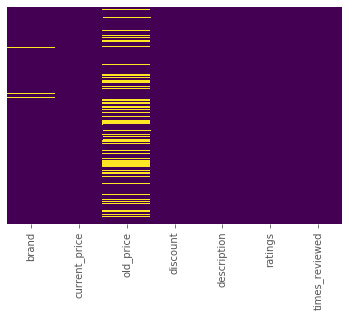

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The yellow strips signify missing data.

We can see that there are no missing data in the current_price, discount, description, ratings and times_reviewed columns. There are a few missing data in the brand column while in the old_price column, there are a lot of missing data. 


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508 entries, 0 to 507
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           502 non-null    object
 1   current_price   508 non-null    object
 2   old_price       350 non-null    object
 3   discount        508 non-null    object
 4   description     508 non-null    object
 5   ratings         508 non-null    int64 
 6   times_reviewed  508 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 17.9+ KB


From the above we can see that there are 508 entries in df. brand has 502 entries, this means about approximately 1% of data is missing in the brand column. The old_price column has 350 entries, this means approximately 31% of the data is missing.

### Dealing with missing values

brand column has just about 1% missing values, it's safe to drop them. On the other hand we would explore other options in dealing with the missing values in the old_price column. It's not be such a good idea to loose 31% of our data.

If we go through the dataframe as shown below we would realize that in rows where the old_price is missing we can see that the discount is filled with the current_price value. In dealing with the missing values in old_price, we would fill the missing old_price with the current_price value and assign 0% to the discount.

In [7]:
df.loc[7:30]

,brand,current_price,old_price,discount,description,ratings,times_reviewed
7,Tecno,"₦ 36,000",NaN,"₦ 36,000","Spark 3 (KB7) 6.2-Inch HD (1GB,16GB ROM) Andro...",75,11
8,Nokia,"₦ 32,300","₦ 59,670",-46%,3.1 Global Version Phone 5.2 Inch 3GB RAM+32GB...,87,36
9,Nokia,"₦ 60,699","₦ 80,000",-24%,"6.1 Plus (Nokia X6) 5.8"" (4GB RAM, 64GB ROM) A...",98,22
10,Nokia,"₦ 35,699","₦ 45,999",-22%,"5.1, 5.5-inch (3GB RAM 32GB ROM), Android 9 Pi...",88,42
11,Oukitel,"₦ 25,880","₦ 43,500",-41%,"C12 - 3G - 6.18"" (2GB RAM, 16GB ROM) - Dual SI...",83,374
12,Oukitel,"₦ 43,199","₦ 55,999",-23%,"C17 Pro 6.35-inch Android 9.0 With Back Case,(...",83,155
13,Tecno,"₦ 59,900","₦ 65,000",-8%,"Pouvoir 3 Plus (LB8a) 6.35"" AMOLED (64GB ROM+ ...",80,4
14,Samsung,"₦ 69,890","₦ 72,990",-4%,"Galaxy A20s 6.5-Inch (3GB,32GB ROM) Android 9....",91,33
15,Samsung,"₦ 98,499","₦ 180,000",-45%,Galaxy S8 Edge 5.8'' QHD(4GB+64GB) 12MP+8MP Sm...,98,7
16,UMIDIGI,"₦ 29,990","₦ 34,990",-14%,"A3X Android 10 Global Version 3GB RAM 5.7"" Sma...",76,59


In [8]:
# dropping missing values in brand
for index,row in df.iterrows():
    if type(row['brand'])==float:
        df.drop(index,inplace=True)
    else:
        pass
    

#replacing missing values in old_price with its value in discount and setting the discount to 0
for index,row in df.iterrows():
    
    _search = re.findall(r'\d+',row['discount']) 
    _join = ''.join(_search)
    _to_int = int(_join)
    if _to_int>100:
        df.at[index,'old_price']=row['discount']
        df.at[index,'discount']='0%'
        #pdb.set_trace()
    else:
        pass

In [9]:
df.loc[7:30]

,brand,current_price,old_price,discount,description,ratings,times_reviewed
7,Tecno,"₦ 36,000","₦ 36,000",0%,"Spark 3 (KB7) 6.2-Inch HD (1GB,16GB ROM) Andro...",75,11
8,Nokia,"₦ 32,300","₦ 59,670",-46%,3.1 Global Version Phone 5.2 Inch 3GB RAM+32GB...,87,36
9,Nokia,"₦ 60,699","₦ 80,000",-24%,"6.1 Plus (Nokia X6) 5.8"" (4GB RAM, 64GB ROM) A...",98,22
10,Nokia,"₦ 35,699","₦ 45,999",-22%,"5.1, 5.5-inch (3GB RAM 32GB ROM), Android 9 Pi...",88,42
11,Oukitel,"₦ 25,880","₦ 43,500",-41%,"C12 - 3G - 6.18"" (2GB RAM, 16GB ROM) - Dual SI...",83,374
12,Oukitel,"₦ 43,199","₦ 55,999",-23%,"C17 Pro 6.35-inch Android 9.0 With Back Case,(...",83,155
13,Tecno,"₦ 59,900","₦ 65,000",-8%,"Pouvoir 3 Plus (LB8a) 6.35"" AMOLED (64GB ROM+ ...",80,4
14,Samsung,"₦ 69,890","₦ 72,990",-4%,"Galaxy A20s 6.5-Inch (3GB,32GB ROM) Android 9....",91,33
15,Samsung,"₦ 98,499","₦ 180,000",-45%,Galaxy S8 Edge 5.8'' QHD(4GB+64GB) 12MP+8MP Sm...,98,7
16,UMIDIGI,"₦ 29,990","₦ 34,990",-14%,"A3X Android 10 Global Version 3GB RAM 5.7"" Sma...",76,59


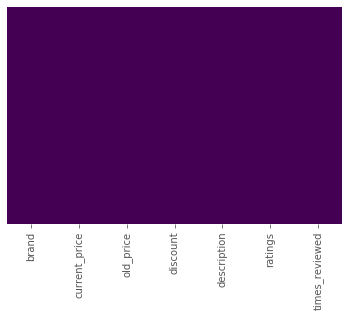

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above heatmap we can see that there are no longer missing values.

### Converting datatypes


In [ ]:
sns.barplot()

In [11]:


# to convert the data in current_price and old_price to int
def convert_price_dtype (value):
    '''
    Converts the data in current_price or old_price to int
    
    Args:
        value (string): The string.
        
    return:
        to_int (int): Returns the digits converted to integers selected from value
    '''
    search = re.findall(r'\d+\d+',value)
    join = ''.join(search)
    to_int = int(join)
    return to_int


#to converts the data in discount to int
def convert_discoount_dtype (value):
    '''
    Converts the data in discount to int.
    
    Args:
        value (string): Accepts a string..
        
    return:
        to_int (int): Returns the digits converted to integers selected from value.
    '''
    search = re.findall(r'\d+',value)
    join = ''.join(search)
    to_int = int(join)
    return to_int


#converting data types for diffrent columns

df['ratings'].astype(int)     #converting rating to int
df['times_reviewed'].astype(int)   #converting times_reviewed to int
df['brand'].astype(str)     #converting brand to str   
df['description'].astype(str)   #converting description to str
df['current_price'] = df['current_price'].apply(convert_price_dtype)  #converting current_price to int
df['old_price'] = df['old_price'].apply(convert_price_dtype)     #converting old_price to int
df['discount'] = df['discount'].apply(convert_discoount_dtype)    #converting discount to int

In [12]:
df.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,70,10
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",76,10
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",86,99
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,81,104
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",78,148


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 507
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           502 non-null    object
 1   current_price   502 non-null    int64 
 2   old_price       502 non-null    int64 
 3   discount        502 non-null    int64 
 4   description     502 non-null    object
 5   ratings         502 non-null    int64 
 6   times_reviewed  502 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 43.5+ KB


### Creating new columns



In [14]:
df.head(10)

,brand,current_price,old_price,discount,description,ratings,times_reviewed
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,70,10
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",76,10
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",86,99
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,81,104
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",78,148
5,Gionee,37350,49990,25,"S11 Lite 5.7-Inch HD (4GB,64GB ROM) Android 7....",85,1145
6,Gionee,37970,55000,31,"S11 Lite 5.7-Inch HD (4GB,64GB ROM) Android 7....",85,668
7,Tecno,36000,36000,0,"Spark 3 (KB7) 6.2-Inch HD (1GB,16GB ROM) Andro...",75,11
8,Nokia,32300,59670,46,3.1 Global Version Phone 5.2 Inch 3GB RAM+32GB...,87,36
9,Nokia,60699,80000,24,"6.1 Plus (Nokia X6) 5.8"" (4GB RAM, 64GB ROM) A...",98,22


### Selecting ROM, RAM, mAh, camera, screen_size and creating star column

In [29]:

def select_ROM(value):
    '''
    Selects the ROM from the description column.
    
    Args: 
        value (str): Accepts the string from the description column.
        
    return:
        varr[i](int): returns the rom as an integer.
    '''
    search_ = re.findall(r'(\d+GB|\d+gb|\d+G ROM|\d+G RAM|\d+GB?[+]\d+GB?|\d+G[+]\d+G|\d+[+]?\d+G|\d+G?B?[+]\d+G?B?)',
                         value,flags = re.IGNORECASE) # searches for ROM or RAM values
   
    # If only one value was found return it as ROM if it has a high value
    if len(search_) == 1: 
        var1 =  re.findall(r'\d+',search_[0])
        if len(var1)>1:
            varr1 = int(var1[0])
            varr2 = int(var1[1])
            if varr1>varr2:
                return varr1 
            else:
                return varr2
            
        else:
            if int(var1[0])>10:
                return int(var1[0])
    
    # If more than one  values were found return the greater value as ROM 
    elif len(search_) >1:
        var1 =  ''.join(re.findall(r'\d+',search_[0]))
        var2 = ''.join(re.findall(r'\d+',search_[1]))
        if int(var1)>int(var2):
            return int(var1) 
        else:
            return int(var2)
    else:
        pass

 
           
def select_RAM(value):
    '''
    Selects the RAM from the description column.
    
    Args: 
        value (str): Accepts the string from the description column.
        
    return:
        varr[i](int): returns the ram as an integer.
    '''
    search_ = re.findall(r'(\d+GB|\d+gb|\d+G ROM|\d+G RAM|\d+GB?[+]\dGB?|\d+G[+]\d+G|\d+[+]?\d+G|\d+G?B?[+]\d+G?B?)',
                         value,flags = re.IGNORECASE)

    # If only one value was found return it as ROM if it has a low value
    if len(search_) == 1: 
        var1 =  re.findall(r'\d+',search_[0])
        
        if len(var1)>1:
            varr1 = int(var1[0])
            varr2 = int(var1[1])
            if varr1<varr2:
                return varr1 
            else:
                return varr2
            
        else:
            if int(var1[0])<10:
                return int(var1[0])         
   
    # If more than one  values were found return the lower value as RAM
    elif len(search_) >1:
        var1 =  ''.join(re.findall(r'\d+',search_[0]))
        var2 = ''.join(re.findall(r'\d+',search_[1]))
        if int(var1)<int(var2):
            return int(var1) 
        else:
            return int(var2)
    else:
        pass

    
def select_mah(value):
    '''
    Selects the mAh value from the description.
    
    Args: 
        value (str): Accepts the string from the description column.
        
    return:
        mAh (int): returns the battery capacity as an integer.
    '''
    search_ = re.findall(r'\d+ ?mAh',value,flags = re.IGNORECASE) # Search for mAh values in description

    # return mAh value if its found
    if len(search_)>0:
        mAh =  ''.join(re.findall(r'\d+',search_[0]))
      
        return int(mAh)
    
def select_camera(value):
    '''
    Selects camera from description.
    
    Args: 
        value (str): Accepts the string from the description column.
        
    return:
        camera (str): returns the camera specs separated by a plus sign.
    '''
    search_ = re.findall(r'\d+[.]?\d{0,5}MP',value,flags = re.IGNORECASE)  # ser4ach for camera values.

    # return camera values if found
    if len(search_)>0:
        camera =  '+'.join(search_)
        
        return camera

    
def summing_camera_values(value):
    '''
    Sums the camera values and outputs the total camera capacity.
    
     Args: 
        value (str): Accepts the string from the description column.
        
    return:
        total_camera (int): returns the sum of the camera specs as an integer.
    '''
    if type(value)==str:
        total=0
        
        camera_values = re.findall(r'\d+',value)   #searches for all camera values

        int_camera_values = [int(i) for i in camera_values]  # convert camera values to int
        
        total_camera =  np.array(int_camera_values).sum()
        
        
        return total_camera   
    else:
        pass
    
    

def select_screen_dimension(value):
    '''
    Selects screen dimension from description.
    
    Args: 
        value (str): Accepts the string from the description column.
        
    return:
        screen_dimension (int): returns the dimension of the screen as an integer.
    '''
    # searches for the screen dimension
    search_screen_dimension = re.findall(r"""\d+[.]?\d{0,3}-? ?I?NCHe?s?|\d+[.]?\d{0,3}"|\d+[.]?\d{0,3}'""",
                                         value,flags = re.IGNORECASE)
    
    if len(search_screen_dimension)>0:
        
        # converting the sereen dimension to float
        screen_dimension = round(float(re.findall(r'\d+[.]?\d{0,3}',search_screen_dimension[0])[0]),2) 
        
        return screen_dimension
    


def convert_to_star(value):
    
    '''
    Converts the ratings to stars from 0 to 5.0 in increments of 0.5.
    
    Args: 
        value (int): Accepts an integer from the ratings column.
        
    return:
         (int): returns the corresponding star value.    
    '''
    # check the rating value and return the corresponding star equivvalent.
    if value<=10:
        return 0.5
    elif 10<value<=20:
        return 1
    elif 20<value<=30:
        return 1.5
    elif 30<value<=40:
        return 2
    elif 40<value<=50:
        return 2.5
    elif 50<value<=60:
        return 3
    elif 60<value<=70:
        return 3.5
    elif 70<value<=80:
        return 4
    elif 80<value<=90:
        return 4.5
    elif value>90:
        return 5
    else:
        pass

In [30]:
# creating new columns

df['ROM']=df['description'].apply(select_ROM)
df['RAM']=df['description'].apply(select_RAM)
df['mAh']=df['description'].apply(select_mah)
df['camera']=df['description'].apply(select_camera)
df['total_camera']=df['camera'].apply(summing_camera_values)
df['screen_size(inch)']=df['description'].apply(select_screen_dimension)
df['star'] = df['ratings'].apply(convert_to_star)



In [33]:
df.head()

,brand,current_price,old_price,discount,description,ratings,times_reviewed,ROM,RAM,mAh,camera,total_camera,screen_size(inch),star
0,Gionee,48000,73630,35,Gionee K3 (M100) 4GB+64GB 6.22 Inch HD+ Androi...,70,10,64.0,4.0,5000.0,None,NaN,6.22,3.5
1,Nokia,59520,119660,50,"7， 5.2-inch (4GB, 64GB ROM) Android 7.1, 16MP ...",76,10,64.0,4.0,3000.0,16MP+5MP,21.0,5.20,4.0
2,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",86,99,NaN,NaN,3950.0,13MP,13.0,5.70,4.5
3,Nokia,42990,70485,39,3.2 3GB RAM 32GB 6.26 Inch 13MP Camera Dual SI...,81,104,32.0,3.0,NaN,13MP,13.0,6.26,4.5
4,UMIDIGI,25990,29990,13,"A3S Android 10 Global Band 3950mAh 5.7"" Smartp...",78,148,NaN,NaN,3950.0,13MP,13.0,5.70,4.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502 entries, 0 to 507
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              502 non-null    object 
 1   current_price      502 non-null    int64  
 2   old_price          502 non-null    int64  
 3   discount           502 non-null    int64  
 4   description        502 non-null    object 
 5   ratings            502 non-null    int64  
 6   times_reviewed     502 non-null    int64  
 7   ROM                473 non-null    float64
 8   RAM                470 non-null    float64
 9   mAh                215 non-null    float64
 10  camera             334 non-null    object 
 11  total_camera       334 non-null    float64
 12  screen_size(inch)  442 non-null    float64
 13  star               502 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 68.9+ KB


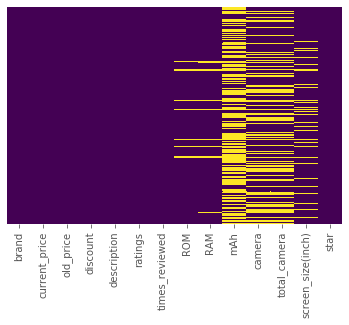

In [35]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above heat map we can see that there are not so many missing values in the ROM and RAM columns. For this reason we would fill the missing values with the average value of the respective column.

### Filling missing values in ROM and RAM columns

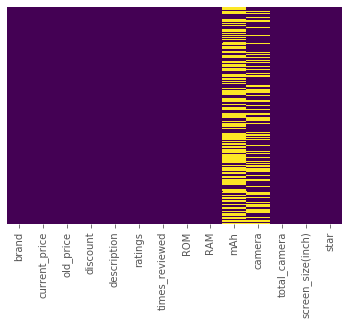

In [36]:

df.fillna({'ROM':round(df['ROM'].median(),0),'RAM':round(df['RAM'].median(),0),
           'screen_size(inch)':round(df['screen_size(inch)'].median(),0),'total_camera':round(df['total_camera'].median(),0)},
          inplace=True)
#df.fillna({'camera':str(df['total_camera'])+'MP'},inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are so many missing values in the mAh, camera and screen_size(inch) columns so we would not drop the rows with missing values to prevent loosing too much of our data. We would rather work with the data in its current form, but keeping the missing values in mind.

In [20]:
# saving the data
df.to_csv(r'C:\Users\DANOLAN\Desktop\Billions\Jumia_data_cleaning.csv')